In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [14]:
import matplotlib as mpl
# Set default font to be bold
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['axes.titleweight'] = 'bold'

In [3]:
con = pd.read_excel('main_expt_results.xlsx', sheet_name='Counter')
re1 = pd.read_excel('main_expt_results.xlsx', sheet_name='Regular1')
re2 = pd.read_excel('main_expt_results.xlsx', sheet_name='Regular2')

In [19]:
def cumulative_sum(input_list):
    cumulative_list = []
    running_total = 0
    
    for num in input_list:
        running_total += num
        cumulative_list.append(running_total)
    
    return cumulative_list

def make_non_zero(inp):
    return [1 if l<1 else l for l in inp ]

def counter_plot():
    widths_required = [5, 3, 5, 2, 5, 2, 5, 3, 5, 2, 5, 3, 5, 2, 5, 2, 5]
    widths_required = [i/4 for i in widths_required]

    mappings =['Dyck-1', '', 'Shuffle-2', '', 'Shuffle-4', '', 'Shuffle-6', '', 'Boolean-3', '', 'Boolean-5', '', '$\mathbf{a^nb^n}$', '', '$\mathbf{a^nb^nc^n}$', '', '$\mathbf{a^nb^nc^nd^n}$']
    x_labels = [m for m in mappings if m]
    widths = cumulative_sum(widths_required)
    widths = [w-1.25 for w, m in zip(widths, mappings) if m]

    con_df = con[con['Model'].isin(['Mamba3', 'Transformers'])]
    trans_df = con_df[con_df['Model'] == 'Transformers']
    mamba_df = con_df[con_df['Model'] == 'Mamba3']

    bin1_val_t = trans_df['Bin1 Accuracy'].tolist()
    bin2_val_t = trans_df['Bin2 Accuracy'].tolist()
    bin1_val_m = mamba_df['Bin1 Accuracy'].tolist()
    bin2_val_m = mamba_df['Bin2 Accuracy'].tolist()
    return widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m


In [20]:
def star_free_df():
    widths_required = [5, 2, 5, 2, 5, 2, 5, 4, 5, 4, 5, 4, 5, 4, 5, 2, 5, 2, 5, 2, 5]
    widths_required = [i/4 for i in widths_required]

    mappings = ['Tomita-1', '', 'Tomita-4', '', 'Tomita-7', '', 'Tomita-2', '', 'aa*bb*cc*dd*ee*', '', '{a,b}*d{b,c}*', '', '{0,1,2}*02*', '', '$\mathbf{D_2}$', '', '$\mathbf{D_3}$', '', '$\mathbf{D_4}$', '', '$\mathbf{D_{12}}$']
    x_labels = [m for m in mappings if m]
    widths = cumulative_sum(widths_required)
    widths = [w-1.25 for w, m in zip(widths, mappings) if m]

    sf_df = re1[(re1['Model'] == 'Mamba3') | (re1['Model'].str.contains('Transformer'))]
    trans_df = sf_df[sf_df['Model'].str.contains('Transformer')]
    mamba_df = sf_df[sf_df['Model'] == 'Mamba3']

    # re1.Model.unique()
    bin1_val_t = trans_df['Bin1 Accuracy'].tolist()
    bin2_val_t = trans_df['Bin2 Accuracy'].tolist()
    bin1_val_m = mamba_df['Bin1 Accuracy'].tolist()
    bin2_val_m = mamba_df['Bin2 Accuracy'].tolist()
    # print(len(widths), len(bin2_val_m))
    len(bin1_val_m), len(bin1_val_t), len(bin2_val_m), len(bin2_val_t), widths
    return widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m

def non_star_free_df():
    widths_required = [5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5]
    widths_required = [i/4 for i in widths_required]
    mappings = ['Parity', '', '(aa)*', '', '(aaaa)*', '', '(abab)*', '', 'Tomita-3', '', 'Tomita-5', '', 'Tomita-6']
    x_labels = [m for m in mappings if m]
    # br1 = [4, 6, 11, 13, 18, 21, 26, 29, 34, 36, 41, 43]
    widths = cumulative_sum(widths_required)
    widths = [w-1.25 for w, m in zip(widths, mappings) if m]

    nsf_df = re2[(re2['Model'] == 'Mamba3') | (re2['Model'].str.contains('Transformer'))]
    trans_df = nsf_df[nsf_df['Model'].str.contains('Transformer')]
    mamba_df = nsf_df[nsf_df['Model'] == 'Mamba3']

    # re1.Model.unique()
    bin1_val_t = trans_df['Bin1 Accuracy'].tolist()
    bin2_val_t = trans_df['Bin2 Accuracy'].tolist()
    bin2_val_t = make_non_zero(bin2_val_t)
    bin1_val_m = mamba_df['Bin1 Accuracy'].tolist()
    bin1_val_m = make_non_zero(bin1_val_m)
    bin2_val_m = mamba_df['Bin2 Accuracy'].tolist()
    bin2_val_m = make_non_zero(bin2_val_m)
    # print(len(widths), len(bin2_val_m))
    return widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m

In [29]:

def plot_sub(axs_plot, widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m, title, barWidth, c1, c2, ylabel_add=False):
    # set height of bar 
    bin1_trans = [w for w in widths]
    bin2_trans = [w + 1.2*barWidth for w in bin1_trans]
    # Since, there should be a gap
    bin1_mamba = [w + 2*barWidth for w in bin2_trans]  
    bin2_mamba = [w + 1.2*barWidth for w in bin1_mamba]

    bin1_val_t = [i/100 for i in bin1_val_t]
    bin2_val_t = [i/100 for i in bin2_val_t]
    bin1_val_m = [i/100 for i in bin1_val_m]
    bin2_val_m = [i/100 for i in bin2_val_m]

    # Make the plot
    axs_plot.bar(bin1_trans, bin1_val_t, color =c1, width = barWidth, label ='Bin [1, 50] Transformer Accuracy') 
    axs_plot.bar(bin1_mamba, bin1_val_m, color =c2, width = barWidth, label ='Bin [1, 50] Mamba Accuracy') 
    axs_plot.bar(bin2_trans, bin2_val_t, color =c1, width = barWidth, edgecolor=c1, hatch='o', fill=False, label ='Bin [51, 100] Transformer Accuracy') 
    axs_plot.bar(bin2_mamba, bin2_val_m, color =c2, width = barWidth, edgecolor=c2, hatch='o', fill=False, label ='Bin [51, 100] Mamba Accuracy') 

    bin1_trans = [w for w in widths]
    axs_plot.set_xticks([r + 1.5*barWidth for r in bin1_trans])
    axs_plot.set_xticklabels(x_labels, fontweight='bold', rotation=0)
    if ylabel_add is True:
        axs_plot.set_ylabel('Test Accuracy', fontweight ='bold', fontsize = 20)
    axs_plot.set_title(title, fontweight ='bold', fontsize = 22) 
    axs_plot.set_ylim(0, 1)

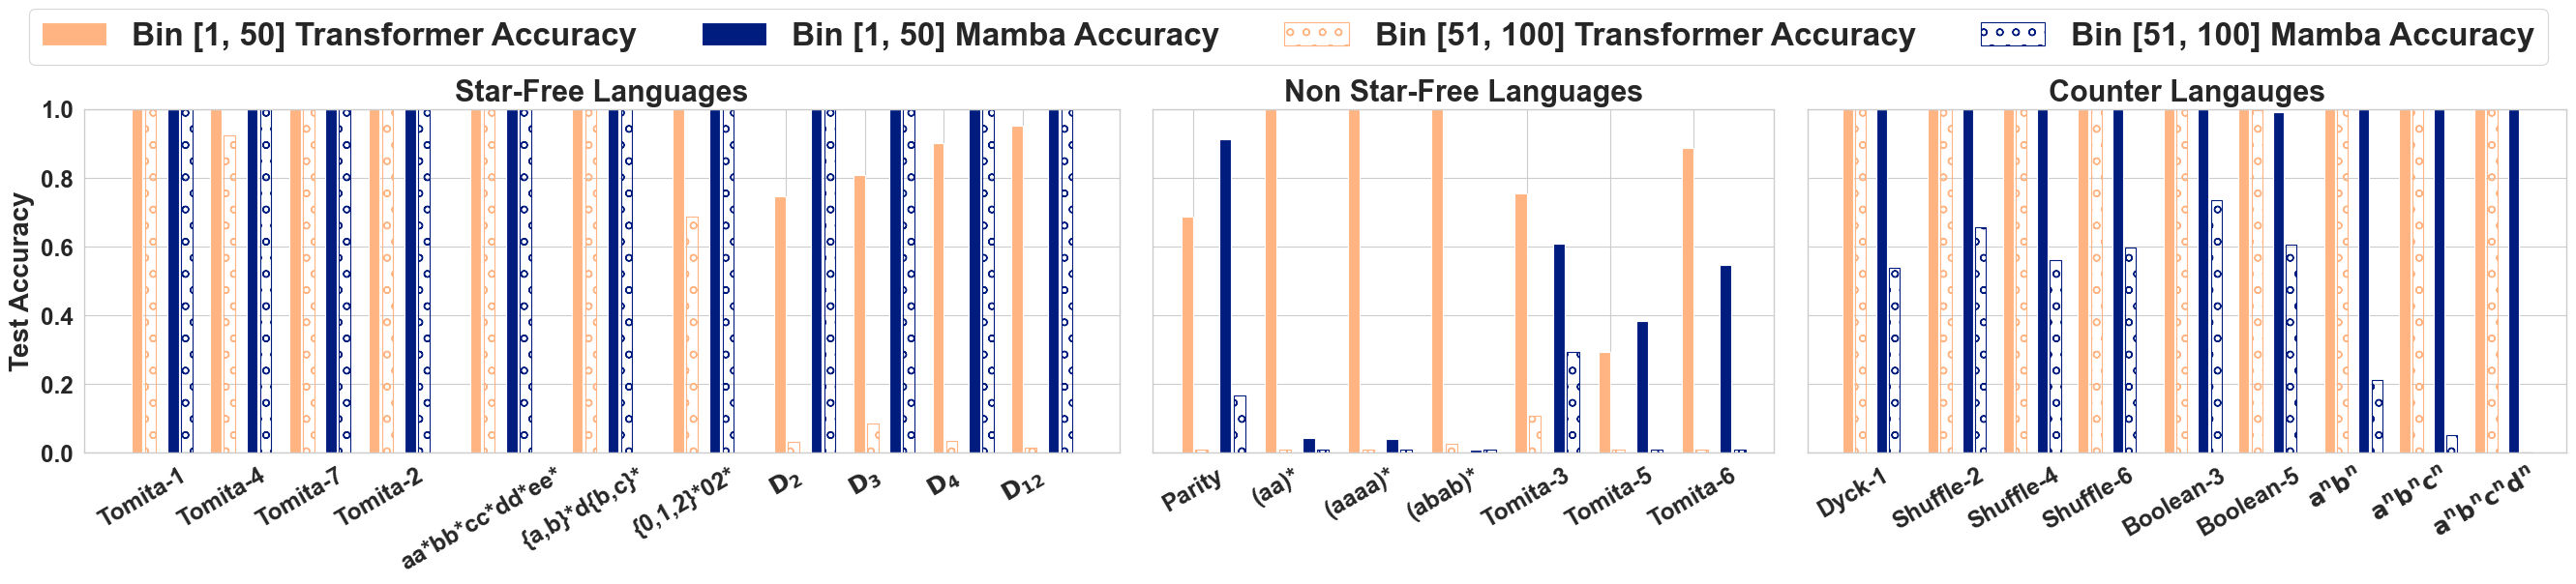

In [26]:
sns.set_theme(style="whitegrid", palette="bright6", context="paper", font_scale=2)
colorsb = sns.color_palette('pastel')
colorsd = sns.color_palette('dark6')
c2, c1 = colorsd[0], colorsb[1]
barWidth = 0.25
fig, axs = plt.subplots(1, 3, figsize =(27, 6), gridspec_kw={'width_ratios': [1.5, 0.9, 1.1]}, sharey=True) 

widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m = star_free_df()
plot_sub(axs[0], widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m, "Star-Free Languages", barWidth, c1, c2, True)
widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m = non_star_free_df()
plot_sub(axs[1], widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m, "Non Star-Free Languages", barWidth, c1, c2)
widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m = counter_plot()
plot_sub(axs[2], widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m, "Counter Langauges", barWidth, c1, c2)

handlers, labels = axs[0].get_legend_handles_labels()

# Get unique labels and handlers
fig.legend(handlers, labels, loc='upper center', ncol=4, fontsize=24, bbox_to_anchor=(0.5, 1.05))
# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("comparison_horz.pdf", bbox_inches="tight")
plt.show()

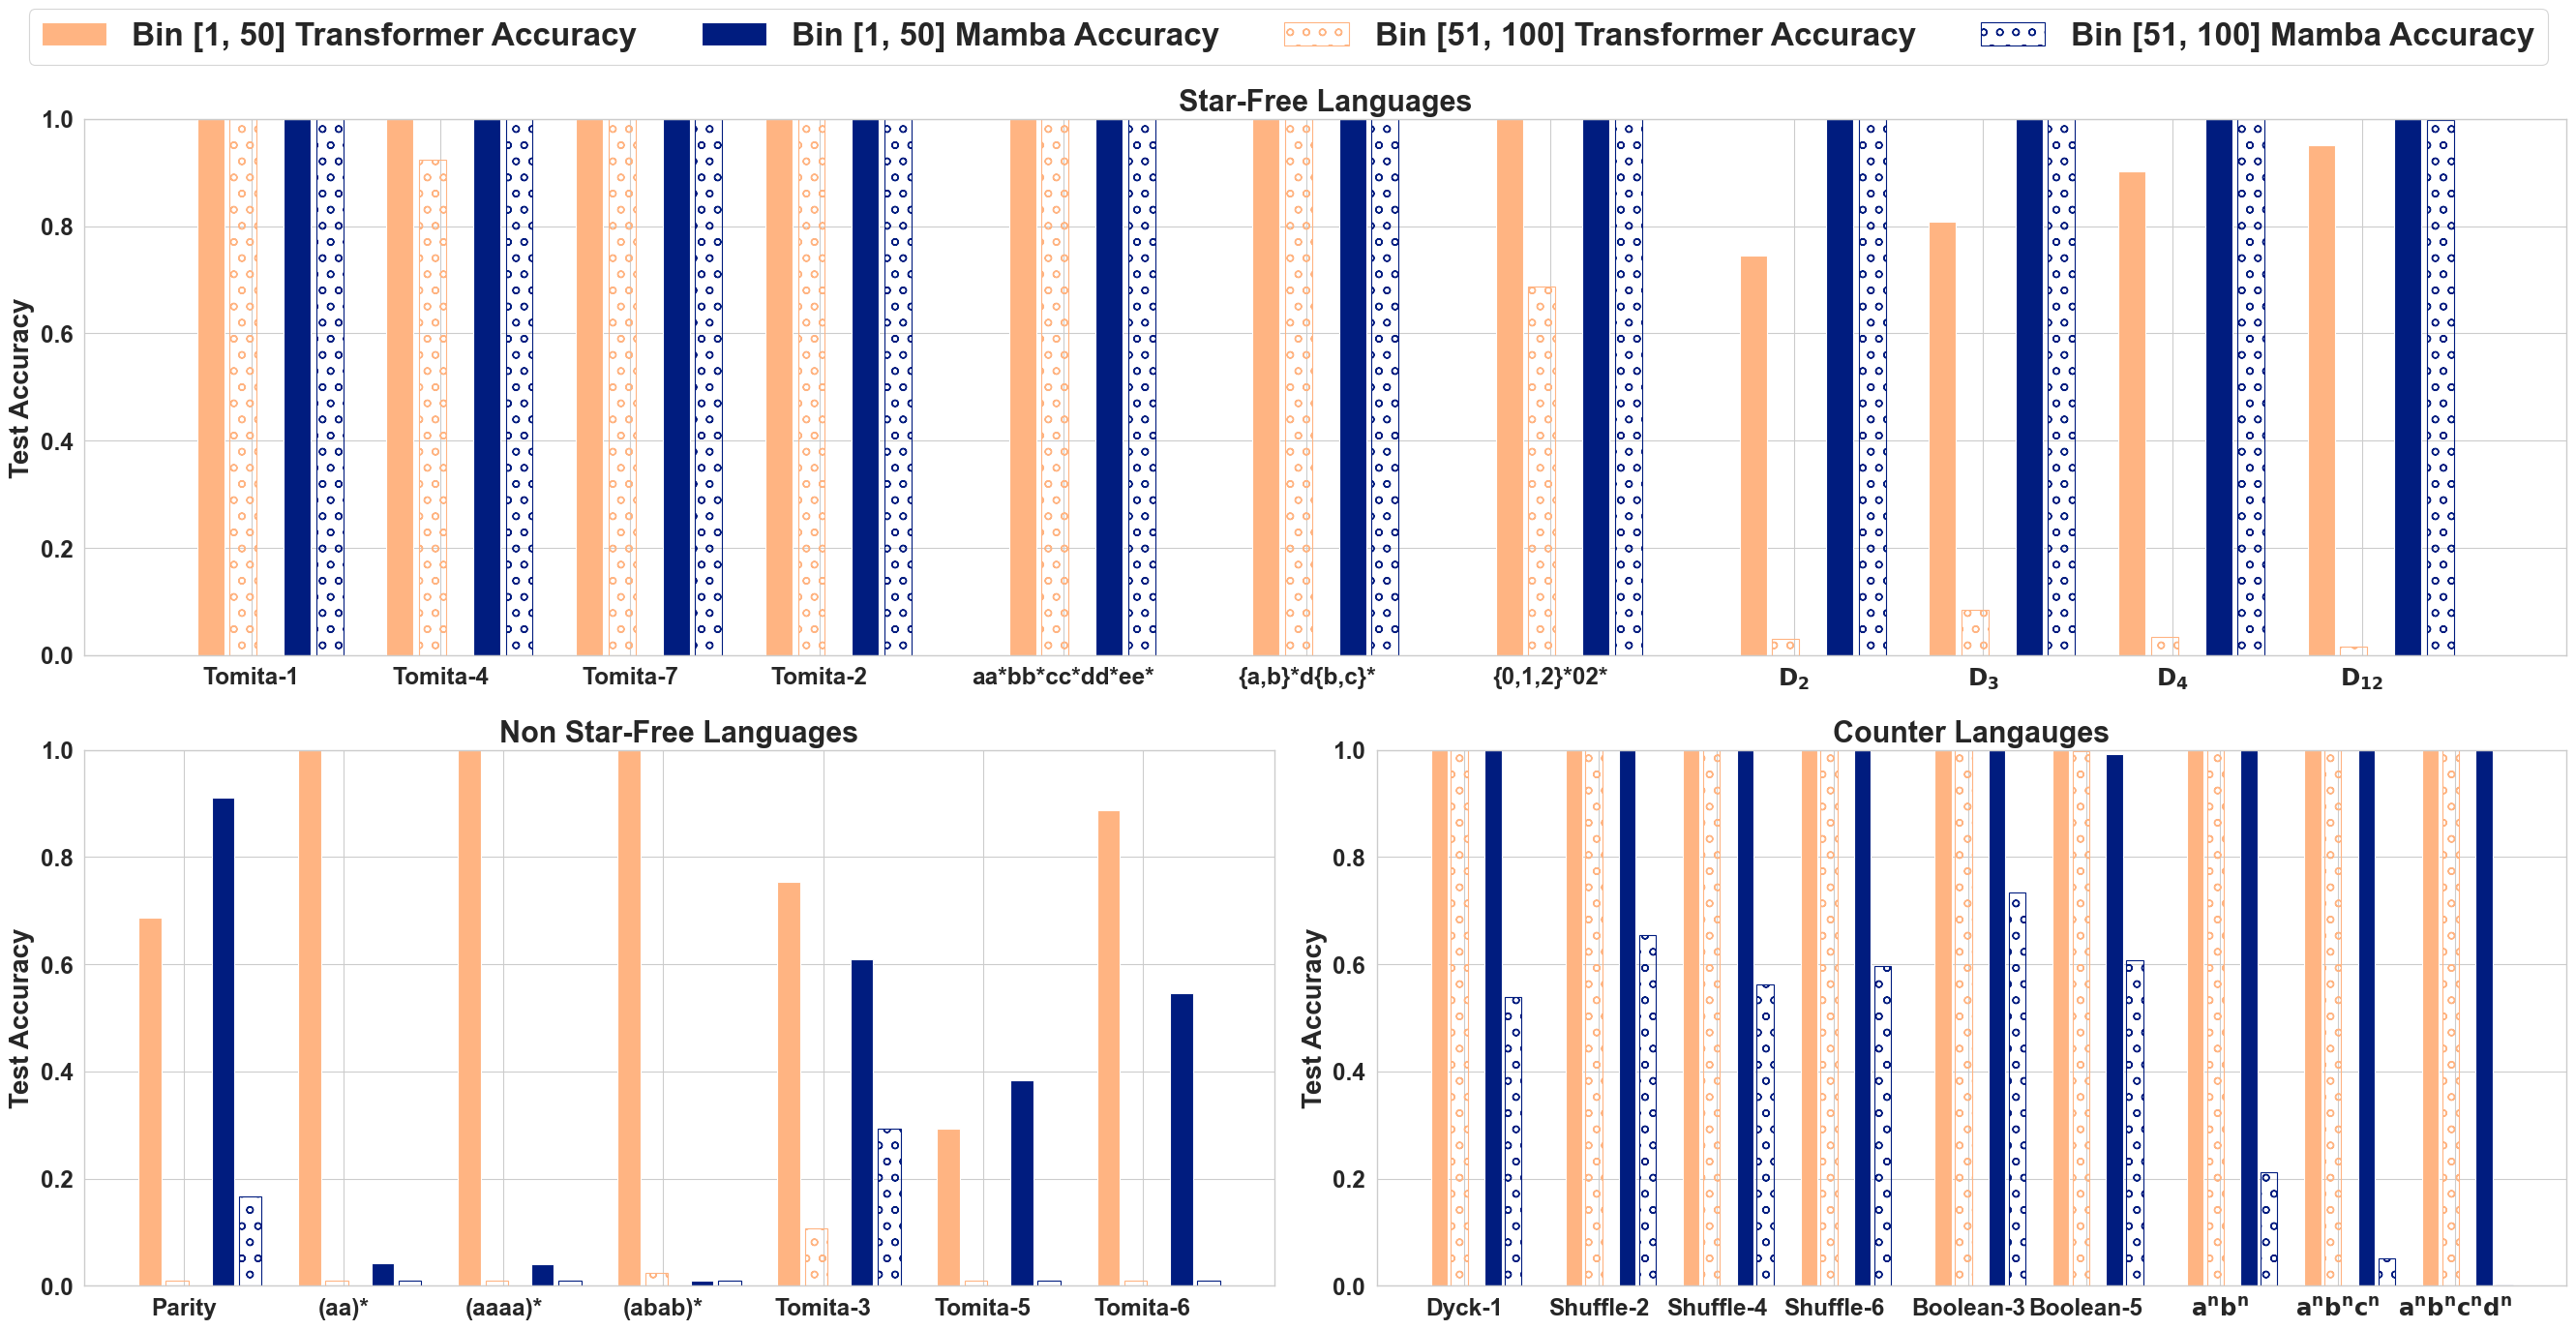

In [30]:
sns.set_theme(style="whitegrid", palette="bright6", context="paper", font_scale=2)
colorsb = sns.color_palette('pastel')
colorsd = sns.color_palette('dark6')
c2, c1 = colorsd[0], colorsb[1]
barWidth = 0.25

# fig, axs = plt.subplots(2, 2, figsize =(27, 14), sharey=True)
fig = plt.figure(figsize=(27, 14))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

# Create subplots
ax1 = fig.add_subplot(gs[0, :])  # Span the first row
ax2 = fig.add_subplot(gs[1, 0])  # Second row, first column
ax3 = fig.add_subplot(gs[1, 1])  # Second row, second column


widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m = star_free_df()
plot_sub(ax1, widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m, "Star-Free Languages", barWidth, c1, c2, True)
widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m = non_star_free_df()
plot_sub(ax2, widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m, "Non Star-Free Languages", barWidth, c1, c2, True)
widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m = counter_plot()
plot_sub(ax3, widths, x_labels, bin1_val_t, bin2_val_t, bin1_val_m, bin2_val_m, "Counter Langauges", barWidth, c1, c2, True)

handlers, labels = ax1.get_legend_handles_labels()

# Get unique labels and handlers
fig.legend(handlers, labels, loc='upper center', ncol=4, fontsize=24, bbox_to_anchor=(0.5, 1))
# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("comparison_vert.pdf", bbox_inches="tight")
plt.show()